In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.patches as patches

In [2]:
tf.__version__

'2.2.0-rc2'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [0]:
# divide train set to train and valid sets
# standarize pixel intesities to range (0, 1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

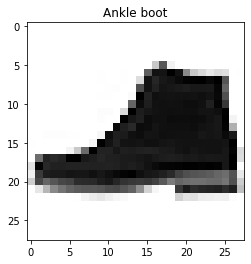

In [8]:
import matplotlib.pyplot as plt

idx = 42

plt.imshow(X_train_full[idx], cmap='Greys')
plt.title(class_names[y_train_full[idx]])

In [9]:
# creating first tensor flow model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# alternative methods of implementing model

model = keras.models.Sequential([
                    keras.layers.Flatten(input_shape=[28, 28]),
                    keras.layers.Dense(300, activation='relu'),
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')         
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
model.layers[1].name

'dense_3'

In [0]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    validation_data=(X_valid, y_valid)
                    )

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7073 - accuracy: 0.7682 - val_loss: 0.4924 - val_accuracy: 0.8366
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4838 - accuracy: 0.8328 - val_loss: 0.4872 - val_accuracy: 0.8226
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4377 - accuracy: 0.8471 - val_loss: 0.4634 - val_accuracy: 0.8356
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4111 - accuracy: 0.8546 - val_loss: 0.3865 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8615 - val_loss: 0.3927 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3753 - accuracy: 0.8679 - val_loss: 0.3931 - val_accuracy: 0.8602
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3616 - accuracy: 0.8724 - val_loss: 0.3593 - val_accuracy:

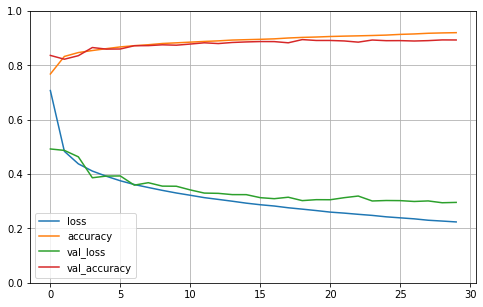

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

ERROR! Session/line number was not unique in database. History logging moved to new session 59
313/313 [==============================] - 1s 2ms/step - loss: 78.2921 - accuracy: 0.8296
loss: 78.29206085205078
accuracy: 0.8295999765396118


['Ankle boot', 'Pullover', 'Trouser']
Ankle boot Ankle boot
Pullover Pullover
Trouser Trouser


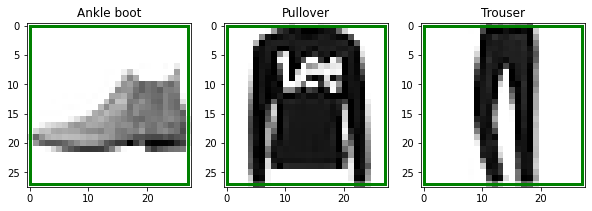

In [50]:
X_new = X_test[:3]
y_new = y_test[:3]

y_pred = [class_names[prediction] for prediction in model.predict_classes(X_new)]
print(y_pred)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 15))

for idx, ax in enumerate(axes):
    ax.imshow(X_new[idx], cmap='Greys')
    ax.set_title(class_names[y_new[idx]])
    color = 'g' if y_pred[idx] == class_names[y_new[idx]] else 'r'
    rect = patches.Rectangle((0, 0), 27, 27, linewidth=3, edgecolor=color, facecolor='none')
    
    ax.add_patch(rect)

